In [7]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random
import scipy 
from scipy import stats
from collections import Counter
import pickle as pkl
import random

In [ ]:
x = 0
y = 1
plt.plot(x, y, marker = "*")

plt.grid()
plt.show()

In [ ]:
x = [1, 10]
y = [-1, 8]

plt.plot(x, y, marker = "o")


# Esta función la podemos usar para marcar el eje X
plt.axhline(0, color = "red")

# Esta función la podemos usar para marcar el eje Y
plt.axvline(0, color = "green") 

plt.grid()
plt.show()

In [ ]:
x = np.linspace(1, 10, 10)
y = [-3, 7, 10, 6, 3, 9, 0, -6, 2, 9]

plt.plot(x, y, marker = "o", color = "red")

# Eje X
plt.axhline(0, color = "green")

# Eje Y
plt.axvline(0, color = "black") 

plt.grid()
plt.show()

In [ ]:
X = [random.randint(-20, 20) for x in range(20)]
Y = [random.randint(-20, 20) for x in range(20)]

plt.scatter(X, Y)

# Eje X
plt.axhline(0, color = "black")

# Eje Y
plt.axvline(0, color = "black") 

plt.grid()
plt.show()


In [ ]:
#cargar un sataset en numpy



In [ ]:
with open("FUELCONSUMPTION_CITY.pkl", "br") as f:
          city_consumption = pkl.load(f)
       
          
city_consumption

In [ ]:
city_consumption = np.genfromtxt("FuelConsumptionCo2.csv", usecols=(8), delimiter=",", skip_header=1, dtype=np.float32)
road_consumption = np.genfromtxt("FuelConsumptionCo2.csv", usecols=(9), delimiter=",", skip_header=1, dtype=np.float32)
manufacturers = np.genfromtxt("FuelConsumptionCo2.csv", usecols=(1), delimiter=",", skip_header=1, dtype=str)
city_consumption
road_consumption
manufacturers

In [ ]:
print(manufacturers.dtype)
print(manufacturers.shape)


In [61]:
print(f"Consumo medio en ciudad: {np.round(np.mean(city_consumption),2):.2f}")
print(f"Coche que mas consume en ciudad: {np.round(np.max(city_consumption),2):.2f}")
print(f"Coche que menos consume en ciudad: {np.round(np.min(city_consumption),2):.2f}")
print(f"Consumo mediana en ciudad: {np.round(np.median(city_consumption),2):.2f}")
print(f"Consumo medio en carretera: {np.round(np.mean(road_consumption),2):.2f}")
print(f"Coche que mas consume en carretera: {np.round(np.max(road_consumption),2):.2f}")
print(f"Coche que menos consume en carretera: {np.round(np.min(road_consumption),2):.2f}")
print(f"Consumo mediana en carretera: {np.round(np.median(road_consumption),2):.2f}")

Consumo medio en ciudad: 13.30
Coche que mas consume en ciudad: 30.20
Coche que menos consume en ciudad: 4.60
Consumo mediana en ciudad: 12.60
Consumo medio en carretera: 9.47
Coche que mas consume en carretera: 20.50
Coche que menos consume en carretera: 4.90
Consumo mediana en carretera: 8.80


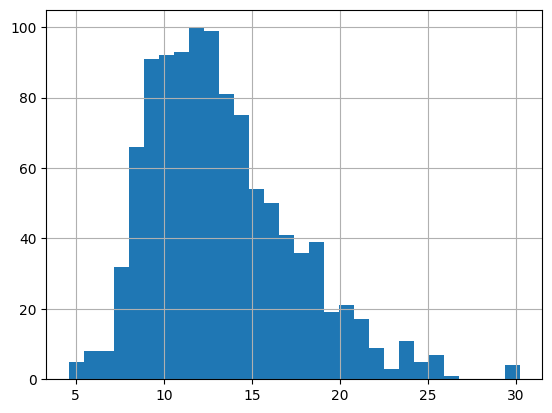

In [60]:
plt.hist(city_consumption, bins=30); # el punto y como final evita que aparezca el array
plt.grid()#bins es la cantidad de barras del histograma

In [ ]:
plt.hist(road_consumption, bins=30);
plt.grid()

In [ ]:
#superponer los graficos
plt.hist(city_consumption, bins=30);
plt.hist(road_consumption, bins=30);
plt.xlabel("Consumo en litros")
plt.ylabel("Cantidad coches")
plt.grid()

In [48]:
np.quantile(a = city_consumption, q= 0.25, interpolation = "lower") #primer quartil
np.quantile(a = city_consumption, q= 0.5, interpolation = "lower")  #segundo quartil 
np.quantile(a = city_consumption, q= 0.75, interpolation = "lower") #te4rmer quartil
np.quantile(a = city_consumption, q = [0.25, 0.50, 0.75], interpolation = "lower")

array([10.2, 12.6, 15.5], dtype=float32)

In [50]:
# Filtros: mascara booleana
city_consumption[city_consumption >= 26]
#np.where

array([30. , 30.2, 26.7, 30. , 30.2], dtype=float32)

In [57]:
#Rango
print(f"Rango consumo ciudad: {round(np.max(city_consumption) - np.min(city_consumption),2):.2f}") #con redondeo y dos decimales
print(f"Rango consumo carretera: {np.max(road_consumption) - np.min(road_consumption)}")


Rango consumo ciudad: 25.60
Rango consumo carretera: 15.600000381469727


In [59]:
#rango quartiles rango intercuartilico IQR
# 1,5 veces mas alla del iqr se consideran valores anomalos o outliers
q1 = np.quantile (a= city_consumption, q= 0.25, interpolation = "lower")
q3 = np.quantile (a= city_consumption, q= 0.75, interpolation = "lower")
iqr = q3-q1
print(f"Rango intercuartilico IQR: {iqr}")

Rango intercuartilico IQR: 5.300000190734863


In [ ]:
#pintar media, mediana, q1, q3, min, max en un histograma


In [ ]:
#boxplot
